In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import linear_model, tree, neighbors

df = px.data.tips()
X = df.total_bill.values[:, None]
X_train, X_test, y_train, y_test = train_test_split(
    X, df.tip, random_state=42)

models = {'Predict Players Cost': regression,
          'Check if player is retained or not': classification,
          'Players Clusters': clustering}

app = dash.Dash(__name__)

app.layout = html.Div([
    html.P("Select Model:"),
    dcc.Dropdown(
        id='model-name',
        options=[{'label': x, 'value': x} 
                 for x in models],
        value='Regression',
        clearable=False
    ),
    dcc.Graph(id="graph"),
])

@app.callback(
    Output("graph", "figure"), 
    [Input('model-name', "value")])
def train_and_display(name):
    model = models[name]()
    model.fit(X_train, y_train)

    x_range = np.linspace(X.min(), X.max(), 100)
    y_range = model.predict(x_range.reshape(-1, 1))

    fig = go.Figure([
        go.Scatter(x=X_train.squeeze(), y=y_train, 
                   name='train', mode='markers'),
        go.Scatter(x=X_test.squeeze(), y=y_test, 
                   name='test', mode='markers'),
        go.Scatter(x=x_range, y=y_range, 
                   name='prediction')
    ])

    return fig

app.run_server(debug=True)

In [6]:
import numpy as np
import pandas as pd
df=pd.read_csv('Clean_Data.csv')
df.head()

,Is Captain(1=yes),Is Wktkeeper(1=Yes),Nationality(1=Overseas),Name,Team,IPL 4 Franchise,Player cost USD,matches,innings played,no,...,half_centuries_ipl,fours_ipl,sixes_ipl,matches_bowl_ipl,balls_bowled_ipl,total_runs_given_ipl,wickets_taken_ipl,bowling_avg_ipl,economy_ipl,3wickets_ipl
0,0.0,0.0,1,Aiden Blizzard,Australia,Mumbai Indians,20000.0,40.0,40.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1,Jonathan Vandiar,South Africa,Royal Challengers Bangalore,20000.0,18.0,18.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1,Nathan Rimmington,Australia,Kings XI Punjab,20000.0,23.0,8.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1,Rilee Rossouw,South Africa,Royal Challengers Bangalore,20000.0,20.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1,Robert Frylinck,South Africa,Delhi Daredevils,20000.0,25.0,22.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
options = []
names=df['Name']
for name in names:
        options.append({'label':'{}'.format(name, name), 'value':name})


In [26]:
df1=df.drop('Name',axis=1)
data = pd.get_dummies(df1, columns=['Team', 'IPL 4 Franchise'])
X = data.drop('Player cost USD', axis=1)
y = data['Player cost USD']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)


In [33]:
from sklearn import linear_model, tree, neighbors    
from matplotlib import pyplot as plt #for customisation
%matplotlib inline

In [29]:
models = {'Predict Players Cost':linear_model.LinearRegression }

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSG

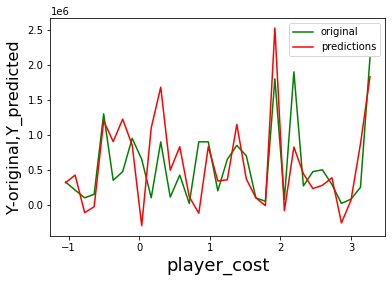

In [37]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from sklearn.externals import joblib
import plotly.graph_objs as go

app = dash.Dash()

app.layout = html.Div(children=[
    html.H1(children='IPL SAGA DASHBOARD', style={'textAlign': 'center'}),
    html.H3(children='YEAR:2011',style={'textAlign': 'center'}),
    #dropdown for players on left
    html.Div(children=[
        
        html.Label("Select player"),
        dcc.Dropdown(
            id = 'my_dropdown1',
            options= options,
            value='Choose columns',
            style=dict(
                    width='40%',
                    verticalAlign="middle"
                )
        ),

        html.Button(
            id='submit-button',
            n_clicks=0,
            children='Submit'
        )
    ],style={'textAlign': 'left'}),
    html.Div([
    html.P("Select Model:"),
    dcc.Dropdown(
        id='model-name',
        options=[{'label': x, 'value': x} 
                 for x in models],
        value='Regression',
        clearable=False
    ),
    dcc.Graph(id="graph"),
])
    html.Div([
    html.P("Select Model:"),
    dcc.Dropdown(
        id='model-name',
        options=[{'label': x, 'value': x} 
                 for x in models],
        value='Predict Players Cost',
        clearable=False
    ),
    dcc.Graph(id="graph"),
])

])
@app.callback(
    Output("graph", "figure"), 
    [Input('model-name', "value")])
    
def train_and_display(name):
    model = models[name]()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    #y_range = y_pred.reshape(-1, 1)
    x = np.linspace(-1.04087012, 3.266556, 33)
    y1 = np.asarray(y_test)
    y2=np.asarray(y_pred)
    #px.plot(df, x="Fruit", y="Number Eaten", color="Contestant", barmode="group")
    plt.plot(x, y1,'g')
    plt.plot(x,y2,'r')
    plt.legend(['original','predictions'])
    plt.xlabel('player_cost', fontsize=18)
    plt.ylabel('Y-original,Y_predicted', fontsize=16)
    plt.show()

    fig = go.Figure([
        go.Scatter(x=X_train.squeeze(), y=y_train, 
                   name='train', mode='markers'),
        go.Scatter(x=X_test.squeeze(), y=y_test, 
                   name='test', mode='markers'),
        go.Scatter(x=x, y=y2, 
                   name='prediction')
    ])

    return fig

   
    

    

if __name__ == '__main__':
    app.run_server(port=4050)

In [2]:
import pandas as pd
import numpy as np
#df=pd.read_csv('linreg_dash.csv')

In [3]:
df=pd.read_csv('two.csv')

In [ ]:
figure6 = px.bar(df1, y='batsman', x='Strike Rate', color='Strike Rate',orientation="h")
figure6.update_layout(title='Batsmen with worst strike rate')
figure6.show()

In [4]:
options = []
names=df['name']
for name in names:
        options.append({'label':'{}'.format(name, name), 'value':name})

In [5]:
import plotly.express as px

In [11]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from sklearn.externals import joblib
import plotly.graph_objs as go
import base64

app = dash.Dash()


models = {'Predict Players Cost': 'regression',
          'Check if player is retained or not': 'classification',
          'Players Clusters': 'clustering'}

image_filename = 'ippl.png' # replace with your own image
encoded_image = base64.b64encode(open(image_filename, 'rb').read())
colors = {
    'background': '#696969',
    'text': '#7FDBFF'
}
app.layout = html.Div(style={'backgroundColor': colors['background']},children=[
    html.H1(children='IPL SAGA DASHBOARD', style={'textAlign': 'center','color':'white'}),
    html.H3(children='YEAR:2011',style={'textAlign': 'center','color':'white'}),
    html.Img(src='data:image/png;base64,{}'.format(encoded_image.decode()),style={'height':'14%', 'width':'14%','float':'right'}),
   
    #dropdown for players on left
    html.Div(children=[
        
        html.Label(children='Select Player',style={'color':'white'}),
        dcc.Dropdown(
            id = 'my_dropdown1',
            options= options,
            value='Choose columns',
            style=dict(
                    width='40%',
                    verticalAlign="middle",
                    
                )
        ),

        html.Button(
            id='submit-button',
            n_clicks=0,
            children='Submit'
        )
    ],style={'textAlign': 'left'}),
    
    #################### FOR MODEL SELECTION ####################
    html.Div([
    html.P("Select Model:"),
    dcc.Dropdown(
        id='model-name',
        options=[{'label': x, 'value': x} 
                 for x in models],
        value='Regression',
        clearable=False
    ),
    #dcc.Graph(id="graph"),
]),
    
    ####################### FOR REGRESSION BAR PLOT #######################
    

    html.Div([
        dcc.Graph(figure=fig2)
    ]),
    html.Div([
    
    #dcc.Graph(id="bar-chart"),
    dcc.Graph(id = 'Bar_Plot1', 
                  figure = {
                      'data' : [
                          {'x':df.name, 'y':df.retained, 'type':'bar', 'name':'First Chart'}
                          ]
                      })

]),
     html.Div([
        dcc.Graph(figure=fig3)
    ]),
    
    
])

################### CALL BACK FUNCTION ###############################
#@app.callback(
#    Output("graph", "figure"), 
#    [Input('model-name', "value")])




    
    

    

if __name__ == '__main__':
    app.run_server(port=4050)


Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:4050/ (Press CTRL+C to quit)
127.0.0.1 - - [07/Mar/2021 20:08:19] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Mar/2021 20:08:19] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [07/Mar/2021 20:08:19] "GET /_favicon.ico?v=1.19.0 HTTP/1.1" 200 -
127.0.0.1 - - [07/Mar/2021 20:08:19] "GET /_dash-layout HTTP/1.1" 200 -


In [8]:
fig = px.line(df, x="name", y="predicted_prices",color="name")
fig.show()

In [10]:
fig2 = px.bar(df, x="name", y="predicted_prices",color="name")
fig2.show()

In [ ]:
#def train_and_display(name):
    #print("heloooo")
    '''
    model = models[name]()
    model.fit(X_train, y_train)

    x_range = np.linspace(X.min(), X.max(), 100)
    y_range = model.predict(x_range.reshape(-1, 1))

    fig = go.Figure([
        go.Scatter(x=X_train.squeeze(), y=y_train, 
                   name='train', mode='markers'),
        go.Scatter(x=X_test.squeeze(), y=y_test, 
                   name='test', mode='markers'),
        go.Scatter(x=x_range, y=y_range, 
                   name='prediction')
                   ])
    '''

In [ ]:
   '''
    html.Div([
    
    #dcc.Graph(id="bar-chart"),
    dcc.Graph(id = 'Bar_Plot', 
                  figure = {
                      'data' : [
                          {'x':df.name, 'y':df.predicted_prices, 'type':'bar', 'name':'First Chart','marker': {
               'color': df.name
           }}
                          ]
                      })

]),
   '''

In [7]:
df_cat = df['retained'].value_counts().reset_index()
df_cat.columns = ['retained', 'name']
fig3 = px.pie(df_cat, values='name', names='retained',title='Player retained[0=Not retained,1=Retained]',color="name")
#fig3.update_traces(textposition='inside', textinfo='percent+label')
fig3.show()
